## Mount data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
workingDir = '/content/drive/Shared drives/ITK Ultrasound Consultation/Zoé_szakdolgozat/data/other_imaging_modalities'
dataDir = workingDir+'/style_transfer_700_0.5M_images/'
outputDir = workingDir+'/style_transfer_700_0.5M_outputs/'

if not os.path.exists(outputDir):
  print('creating directory: '+outputDir)
  os.chdir(workingDir)
  os.mkdir(outputDir)


if not os.path.exists(outputDir+'masks'):
  print('creating directory: '+outputDir+'masks')
  os.chdir(outputDir)
  os.mkdir('masks')
if not os.path.exists(outputDir+'images'):
  print('creating directory: '+outputDir+'images')
  os.chdir(outputDir)
  os.mkdir('images')

Mounted at /content/drive


## Segmentation

1
Compute masks
above
skin
dermis


lesion


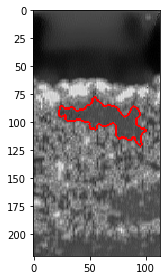

2
Compute masks
above
skin
dermis


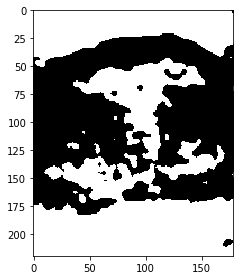

lesion


3
Compute masks
above
skin
dermis


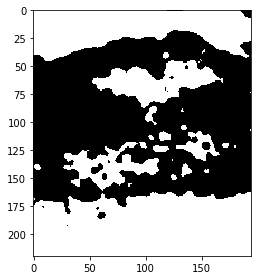

lesion


4
Compute masks
above
skin
dermis


lesion


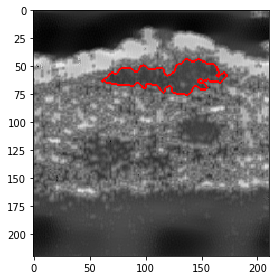

5
Compute masks
above
skin
dermis


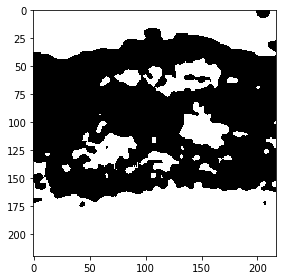

lesion


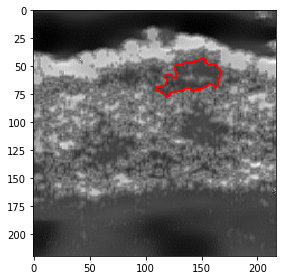

6
Compute masks
above
skin
dermis


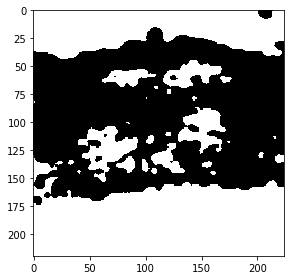

lesion


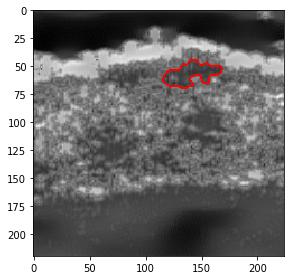

7
Compute masks
above
skin
dermis


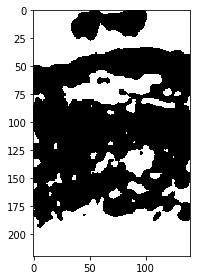

lesion


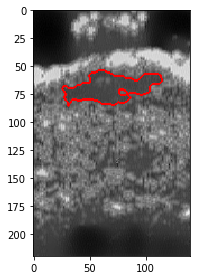

8
Compute masks
above
skin
dermis


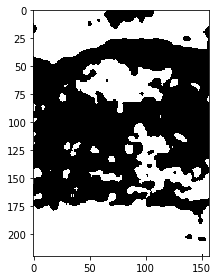

lesion


9
Compute masks
above
skin
dermis


lesion


10
Compute masks
above
skin
dermis


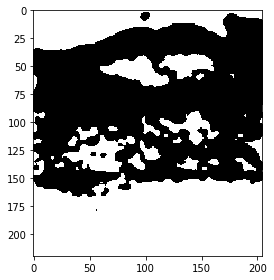

lesion


11
Compute masks
above
skin
dermis


lesion


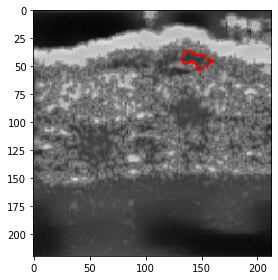

12
Compute masks
above
skin
dermis


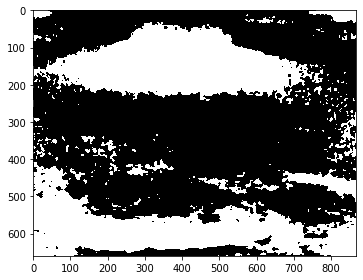

lesion


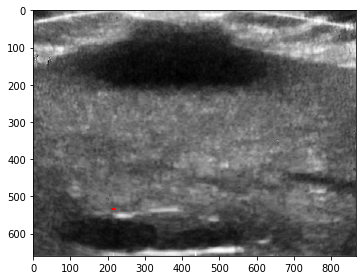

13
Compute masks
above
skin
dermis


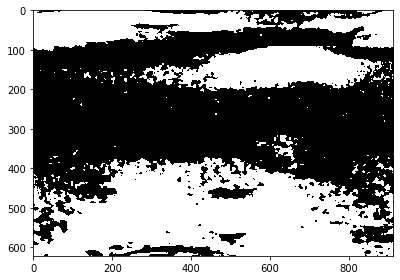

lesion


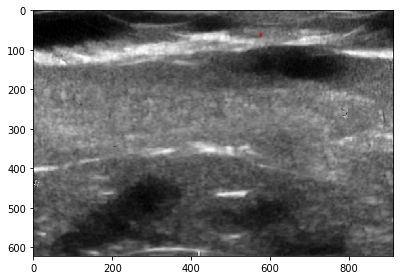

14
Compute masks
above
skin
dermis


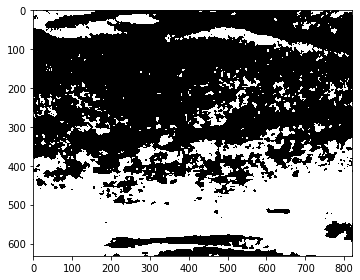

lesion


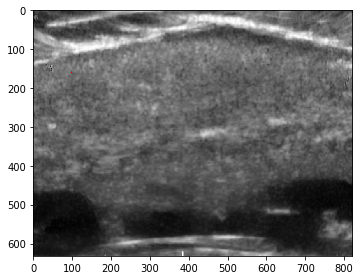

15
Compute masks
above
skin
dermis


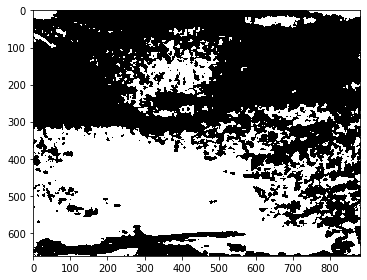

lesion


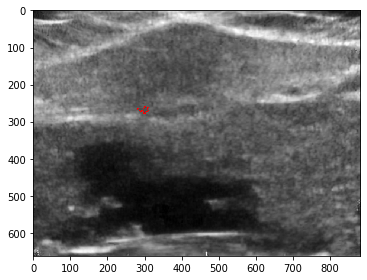

16
Compute masks
above
skin
dermis


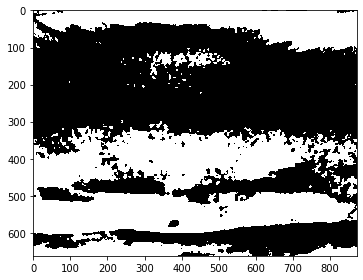

lesion


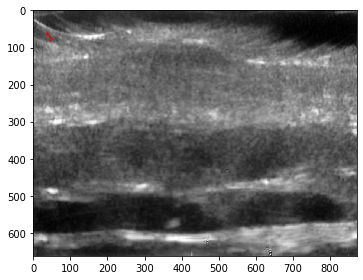

17
Compute masks
above
skin
dermis


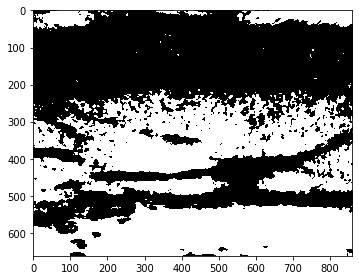

lesion


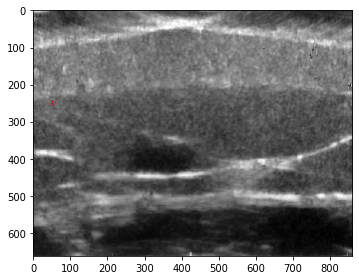

18
Compute masks
above
skin
dermis


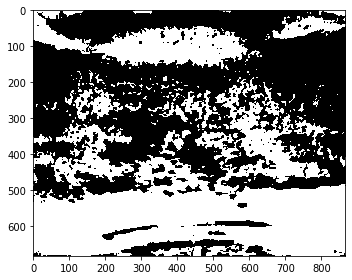

lesion


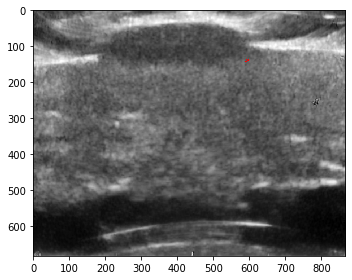

19
Compute masks
above
skin
dermis


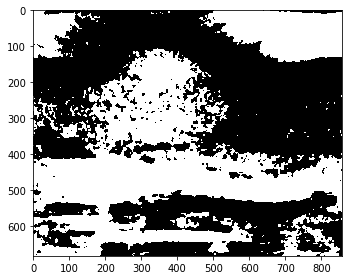

lesion


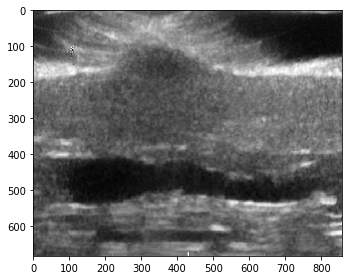

20
Compute masks
above
skin
dermis


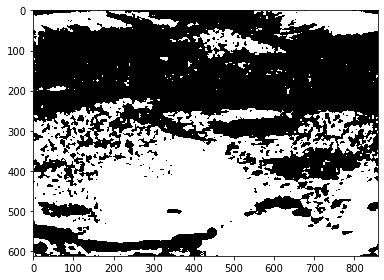

lesion


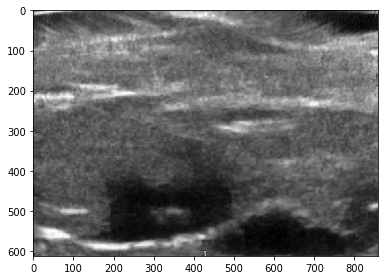

21
Compute masks
above
skin
dermis


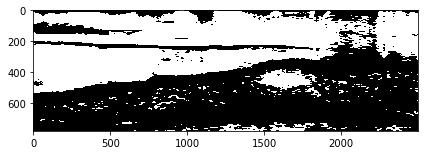

lesion


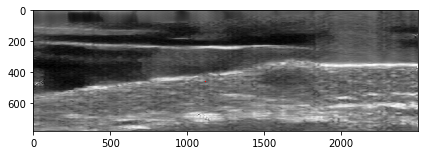

22
Compute masks
above
skin
dermis


lesion


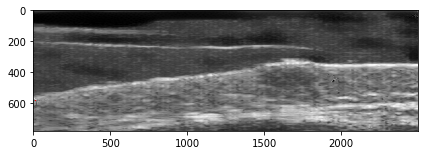

23
Compute masks
above
skin
dermis


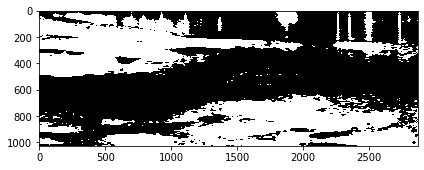

lesion


24
Compute masks
above
skin
dermis


lesion


25
Compute masks
above
skin
dermis


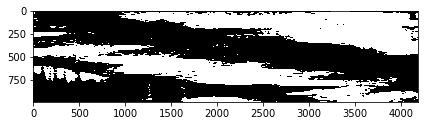

lesion


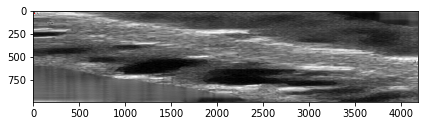

26
Compute masks
above
skin
dermis


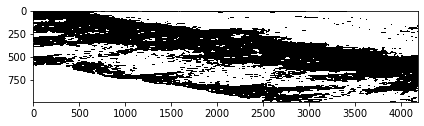

lesion


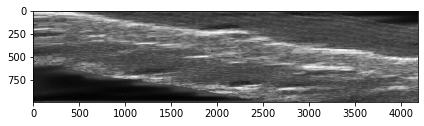

27
Compute masks
above
skin
dermis
list index out of range
28
Compute masks
above
skin
dermis
list index out of range
29
Compute masks
above
skin
dermis


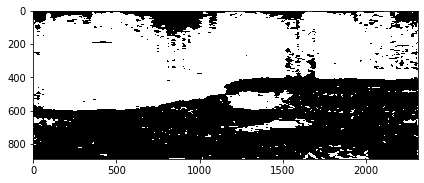

lesion


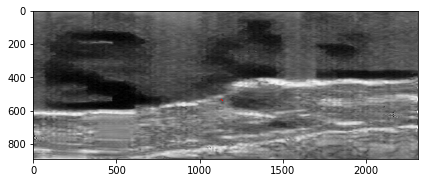

30
Compute masks
above
skin
dermis


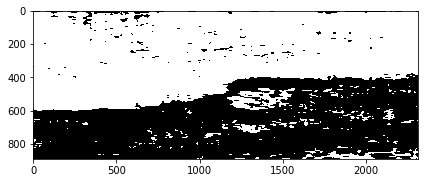

lesion


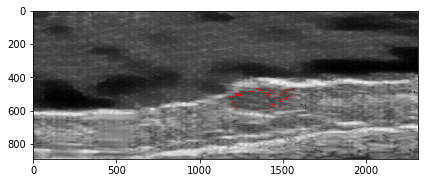

31
Compute masks
above
skin
dermis


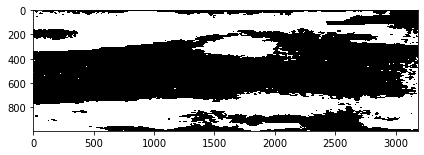

lesion


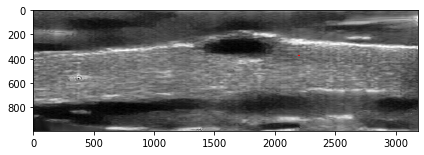

32
Compute masks
above
skin
dermis


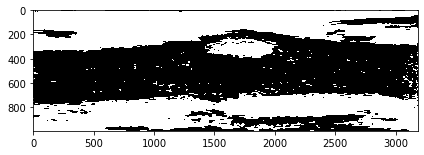

lesion


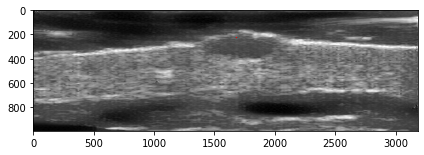

33
Compute masks
above
skin
dermis


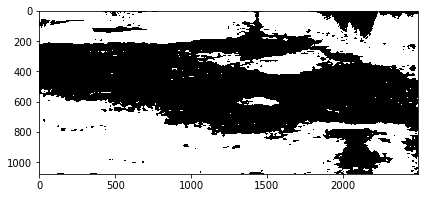

lesion


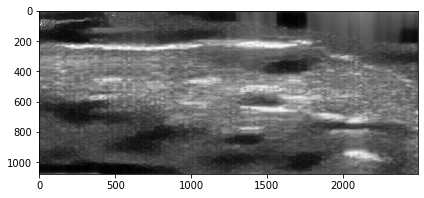

34
Compute masks
above
skin
dermis


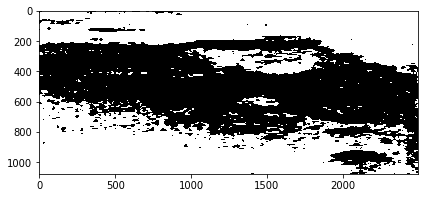

lesion


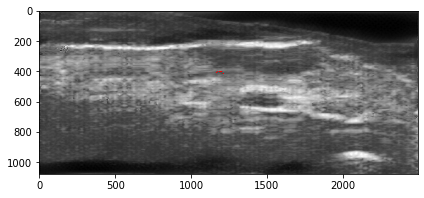

35
Compute masks
above
skin
dermis


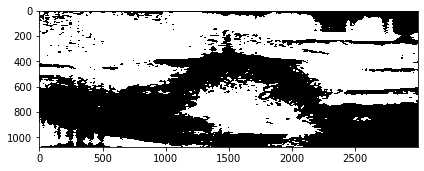

lesion


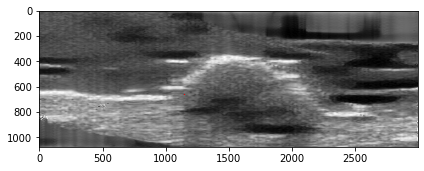

36
Compute masks
above
skin
dermis


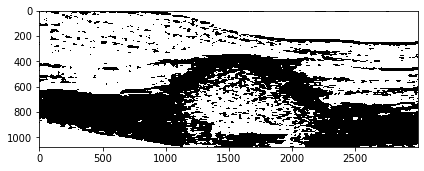

lesion


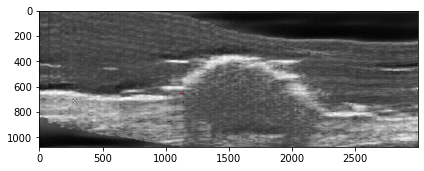

37
Compute masks
above
skin
dermis


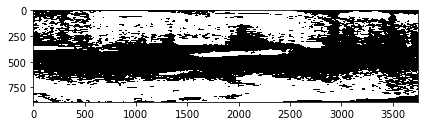

lesion


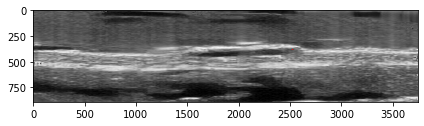

38
Compute masks
above
skin
dermis


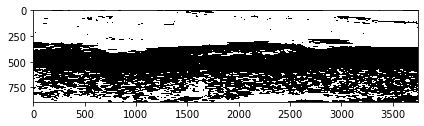

lesion


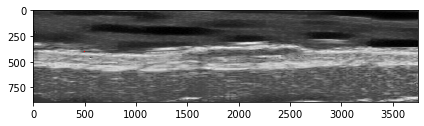

39
Compute masks
above
skin
dermis


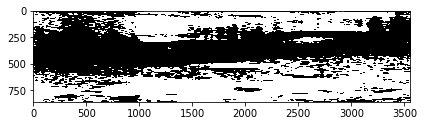

lesion


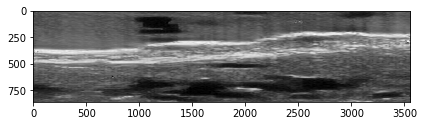

40
Compute masks
above
skin
dermis


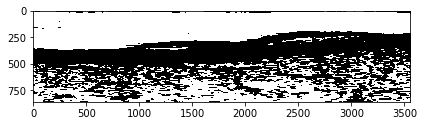

lesion


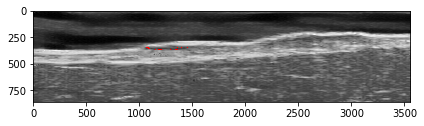

41
Compute masks
above
skin
dermis
list index out of range
42
Compute masks
above
skin
dermis


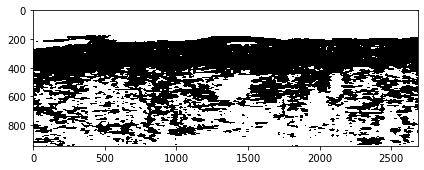

lesion


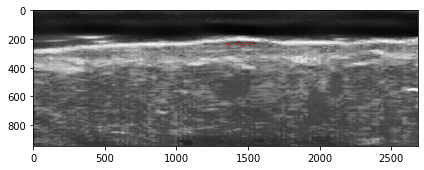

43
Compute masks
above
skin
dermis


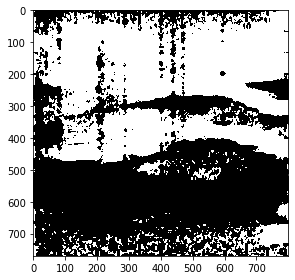

lesion


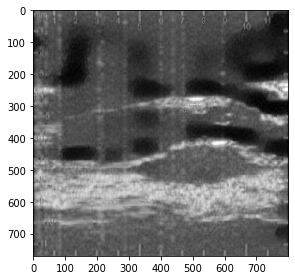

44
Compute masks
above
skin
dermis


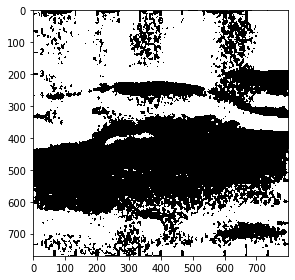

lesion


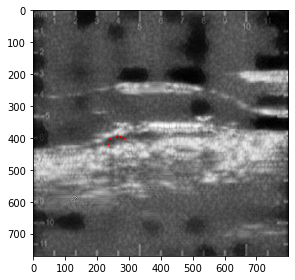

45
Compute masks
above
skin
dermis


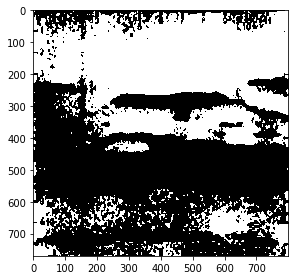

lesion


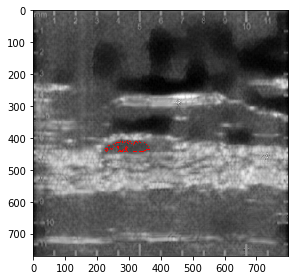

46
Compute masks
above
skin
dermis


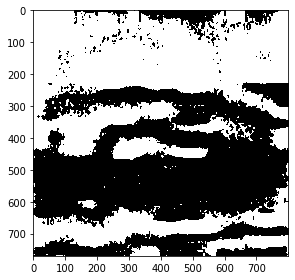

lesion


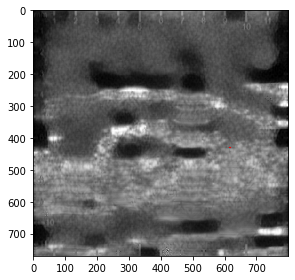

47
Compute masks
above
skin
dermis


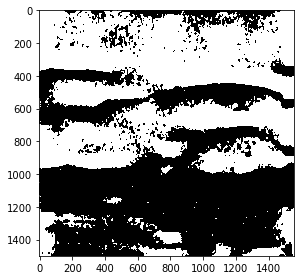

lesion


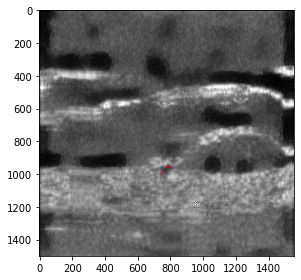

48
Compute masks
above
skin
dermis


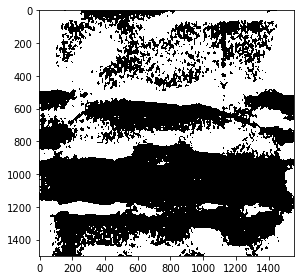

lesion


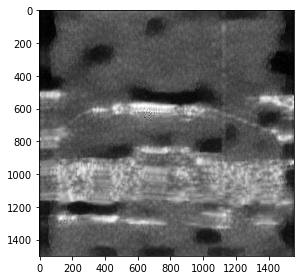

49
Compute masks
above
skin
dermis


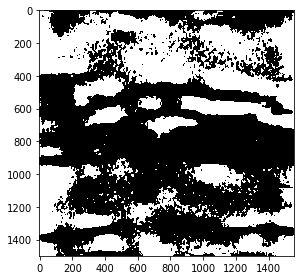

lesion


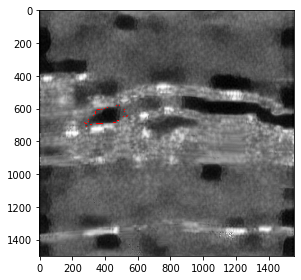

50
Compute masks
above
skin
dermis


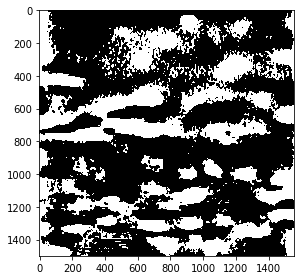

lesion


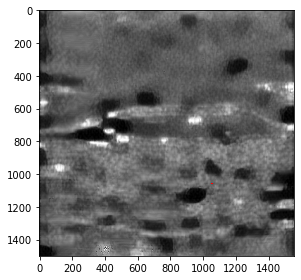

51
Compute masks
above
skin
dermis


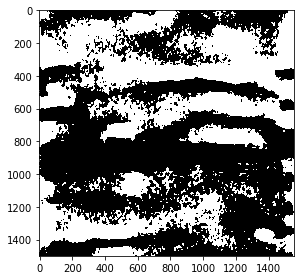

lesion


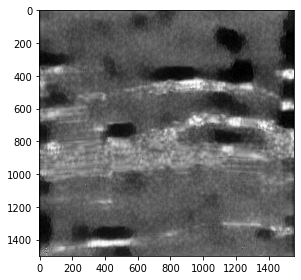

52
Compute masks
above
skin
dermis
list index out of range
53
Compute masks
above
skin
dermis
list index out of range
54
Compute masks
above
skin
dermis


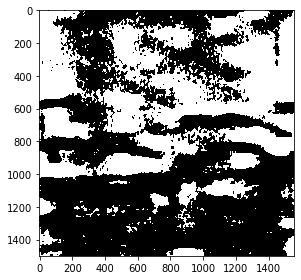

lesion


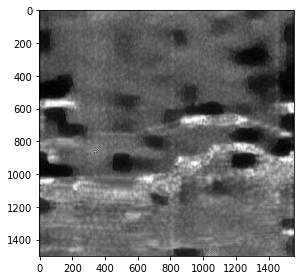

In [ ]:
import os
import numpy as np
import time
import natsort
import pandas as pd
import pickle

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.figure import Figure

from scipy.signal import savgol_filter as SGfilt
from scipy.ndimage import gaussian_filter as gaussfilt
from scipy.signal import medfilt
from scipy import ndimage
from scipy.ndimage.filters import laplace

import skimage.transform
from skimage import io
from skimage.morphology import disk, dilation
from skimage.color import rgb2gray
from skimage import exposure
from skimage.filters import median
from skimage.filters import threshold_multiotsu
from skimage.segmentation import mark_boundaries
from skimage import measure
from skimage.segmentation import active_contour
from skimage.measure import find_contours


# AUXILIARY FUNCTIONS
# save image to output_data
def display_image(image, file_name):
  fig = plt.figure() 
  io.imshow(image)
  #fig.savefig(workingDir+'/output_images/'+str(i) + file_name+'.png', dpi=450)
  #fig.savefig(outputDir+'/'+str(i) + file_name+'.png', dpi=450)
  #fig.savefig(outputDir+'/'+ file_name+'.png', dpi=450)
  fig.savefig(outputDir+'/images/'+ file_name+'.png', dpi=450)
  plt.close(fig)

# save binary mask
def save_mask_binary(maskToSave, i, maskType):
  #file_temp = open(workingDir+'/output_images/masks/'+str(i)+'_'+maskType, 'wb')
  file_temp = open(outputDir+'/masks/'+maskType, 'wb')
  pickle.dump(maskToSave, file_temp)
  file_temp.close()

# load binary mask
def load_mask_binary(i, maskType):
  #file_masks = open(workingDir+'/output_images/masks/'+str(i)+'_'+maskType, 'rb')
  #file_masks = open(outputDir+'/masks/'+str(i)+'_'+maskType, 'rb')
  file_masks = open(outputDir+'/masks/'+maskType, 'rb')
  mask = pickle.load(file_masks)
  file_masks.close()
  return mask

# all masks of one image together
class Masks:
    mask_lesion = 0;

# extend masks to original input size
def extend_masks(y, x, masks):
  aboveskin_mask_ori_size = np.zeros([y, x]);
  skin_mask_ori_size = np.zeros([y, x]);
  epidermis_mask_ori_size = np.zeros([y, x]);
  dermis_mask_ori_size = np.zeros([y, x]);
  lesion_mask_ori_size = np.zeros([y, x]);

  aboveskin_mask_ori_size[crop_up:y-crop_down,crop_left:x-crop_right] = masks.mask_aboveskin;
  skin_mask_ori_size[crop_up:y-crop_down,crop_left:x-crop_right] = masks.mask_skin;
  epidermis_mask_ori_size[crop_up:y-crop_down,crop_left:x-crop_right] = masks.mask_epidermis;
  dermis_mask_ori_size[crop_up:y-crop_down,crop_left:x-crop_right] = masks.mask_dermis;
  lesion_mask_ori_size[crop_up:y-crop_down,crop_left:x-crop_right] = masks.mask_lesion;

  ori_size_masks = Masks();
  ori_size_masks.mask_aboveskin = aboveskin_mask_ori_size;
  ori_size_masks.mask_skin = skin_mask_ori_size;
  ori_size_masks.mask_epidermis = epidermis_mask_ori_size;
  ori_size_masks.mask_dermis = dermis_mask_ori_size;
  ori_size_masks.mask_lesion = lesion_mask_ori_size;
  return ori_size_masks;



##############################################################################################################
# CALCULATE HEATMAP ABOVESKIN
def calc_heatmap_aboveskin(height, width):
    # HEATMAP line-by-line reducing prob
    heat_map = np.zeros([height, width])
    for i in range(height):
            heat_map[i] = (i**(0.8));
    
    #heat_map = heat_map.astype(int)
    heat_map =  np.amax(heat_map)-heat_map
    heat_map[round(height*2/3):height,:] = 0
    
    # heat_map = np.zeros([height, width])
    # for i in range(height):
    #     for j in range(width):
    #         heat_map[j][i] = j;
    
    # #heat_map = heat_map.astype(int)
    # heat_map =  np.amax(heat_map)-heat_map

    return heat_map;

# CALCULATE BIGGEST BLOB
def calc_biggest_blob(binary, heat_map, blob_size_threshold):
    
    labels_mask = measure.label(binary)
    regions = measure.regionprops(labels_mask)
    regions.sort(key=lambda x: x.area, reverse=True)
    
    if blob_size_threshold > 0:
        remove_counter = 0;
        # REMOVE REGION BELOW A THRESHOLD
        if len(regions) > 1:
            for rg in regions[0:]:
                if len(rg.coords) > blob_size_threshold:
                    remove_counter = remove_counter+1
        del(regions[remove_counter:])  
    
    
    # FIND BIGGEST WEIGHT REGION
    weights = np.zeros(len(regions))
    label_mask = regions[0]._label_image;
    # go through all regions if exists some
    if len(regions) > 1:
        counter = 0;
        # for each single region
        for rg in regions:
            binaryValue = binary[rg.coords[0,0], rg.coords[0,1]]
            label = label_mask[rg.coords[0,0], rg.coords[0,1]]
            if binaryValue.all() ==True:  
                weights[counter] = sum(sum((label_mask == label)*heat_map))    
            counter = counter+1;
    
    max_index = np.argmax(weights)
    selected_region = regions[max_index]
     
    # Remove other blobs!
    aboveskin_mask = np.zeros([binary.shape[0], binary.shape[1]]);
    aboveskin_mask[selected_region.coords[:,0], selected_region.coords[:,1]] = 1
    
    return aboveskin_mask;




##############################################################################################################
# SEGMENTATION MAIN FRAMEWORK
def segmentation(image, imageInx):

    image_ori = image;
  
    # Adaptive histogram equalization
    #image = exposure.equalize_adapthist(image, clip_limit=0.03)
    
    # Adaptive smoothing
    grad= np.average(np.absolute(np.gradient(image)[0]))
    smoothness_original = np.average(np.absolute(laplace(image)))
    
    #while grad > 0.05:
    #    image = median(image)#, disk(7)
    #    grad = np.average(np.absolute(np.gradient(image)[0]))
    
    #image = median(image, disk(7))
    # MULTI-THRESHOLD OTSU & BINARIZATION
    thresholds = threshold_multiotsu(image, 4)
    # regions = np.digitize(image, bins=thresholds)
    
    # io.imshow(regions)    # image, regions, mask_aboveskin
    # plt.show()
    

    # TODO: maybe some histogram equalization could improve the detection
    mask_aboveskin = image < thresholds[1]
    minimum_lane_width = 5;
    mask_aboveskin[1:minimum_lane_width, :] = 1
    mask_aboveskin[1:minimum_lane_width, 0] = 1
    mask_aboveskin[1:minimum_lane_width, image.shape[1]-1] = 1
    # io.imshow(mask_aboveskin)    # image, regions, mask_aboveskin
    # plt.show()
    
    ################################  ABOVE SKIN  ################################
    
    #display_image(mask_aboveskin, "_01_mask_aboveskin")
    #io.imshow(mask_aboveskin) 
    #plt.show()
    
    blob_size_threshold = 100;
    heatmap_aboveskin = calc_heatmap_aboveskin(image.shape[0], image.shape[1])

    #display_image(heatmap_aboveskin, "_02_heatmap_aboveskin")
    #io.imshow(heatmap_aboveskin) 
    #plt.show()
    print("above")
    mask_aboveskin = calc_biggest_blob(mask_aboveskin, heatmap_aboveskin, blob_size_threshold)    
    
    #display_image(mask_aboveskin, "_03_mask_aboveskin")
    #io.imshow(mask_aboveskin)
    #plt.show()
 
    mask_aboveskin = ndimage.binary_fill_holes(mask_aboveskin)
    mask_skin = np.invert(mask_aboveskin);
    
    
    # post proc
    heat_map_ab = ndimage.distance_transform_edt(mask_skin);
    heat_map_ab = np.amax(heat_map_ab) - heat_map_ab;
    heat_map_ab = heat_map_ab*mask_skin;
    mask_ab = heat_map_ab > (np.amax(heat_map_ab))
    mask_aboveskin = np.logical_xor(mask_aboveskin,mask_ab)
    mask_aboveskin = ndimage.binary_fill_holes(mask_aboveskin)
    mask_skin = np.invert(mask_aboveskin);
    
    heatmap_ones =  np.ones(mask_skin.shape)
    print("skin")
    mask_skin = calc_biggest_blob(mask_skin, heatmap_ones, 0)    
    mask_skin = mask_skin.astype(bool)
    mask_aboveskin = np.invert(mask_skin)

    #display_image(mask_aboveskin, "_01_mask_aboveskin")

  
    ################################  EPIDERMIS  #################################
    
    # radius = 7;
    # mask = disk(radius)
    # for it in range(10):
    #     mask_epidermis = dilation(mask_aboveskin, selem=mask)
    # mask_epidermis = np.logical_xor(mask_epidermis,mask_aboveskin)
    
    heat_map_epidermis = ndimage.distance_transform_edt(mask_skin);
    heat_map_epidermis = np.amax(heat_map_epidermis) - heat_map_epidermis;
    heat_map_epidermis = heat_map_epidermis*mask_skin;
    epidermis_thickness = 12;
    mask_epidermis = heat_map_epidermis > (np.amax(heat_map_epidermis-epidermis_thickness))

    ## TODO!!!! epidermis could be segmentation based on clustering!!!
    # io.imshow(mask_epidermis)       # heat_map_epidermis
    # plt.show()
    

    #display_image(mark_boundaries(image, mask_skin+2*mask_epidermis, color=(1, 0, 0), outline_color=None, mode='thick', background_label=0), "_05_mask_skin_epidermis")
    #io.imshow(mark_boundaries(image, mask_skin+2*mask_epidermis, color=(1, 0, 0), outline_color=None, mode='thick', background_label=0)) 
    #plt.show()
    
    #display_image(mark_boundaries(image_ori, mask_aboveskin+2*mask_epidermis, color=(1, 0, 0), outline_color=None, mode='thick', background_label=0), "_mask_epidermis")

    
    ###################################  DERMIS  ##################################
    
    # dermis thickness
    mask_dermis = np.invert(np.logical_xor(mask_aboveskin,mask_epidermis))
    heat_map_dermis = ndimage.distance_transform_edt(mask_dermis);
    heat_map_dermis = np.amax(heat_map_dermis) - heat_map_dermis;
    heat_map_dermis = heat_map_dermis*mask_dermis;
    dermis_thickness = 200;
    mask_dermis = heat_map_dermis > (np.amax(heat_map_dermis-dermis_thickness))
    
    # io.imshow(mask_dermis)       # heat_map_dermis
    # plt.show()
    
    # dermis echogenicity
    thresholds = threshold_multiotsu(image, 5)
    #regions = np.digitize(image, bins=thresholds)
    binary_dermis = image > thresholds[1]
    
    # io.imshow(binary_dermis)       # heat_map_dermis
    # plt.show()
    
    mask_dermis = np.logical_and(mask_dermis, binary_dermis)
    # io.imshow(mask_dermis)       # heat_map_dermis
    # plt.show()
    
    blob_size_threshold = 50;
    print("dermis")
    mask_dermis = calc_biggest_blob(mask_dermis, heat_map_dermis, blob_size_threshold)
    
    # radius = 3;
    # mask = disk(radius)
    # for k in range(3):
    #     mask_dermis = dilation(mask_dermis, selem=mask)
    
    mask_dermis = np.logical_xor(mask_dermis, np.logical_and(mask_epidermis, mask_aboveskin))
    # mask_dermis = np.logical_xor(mask_dermis, mask_aboveskin)
    mask_dermis = ndimage.binary_fill_holes(mask_dermis)
    #mask_dermis = np.logical_and(mask_dermis, np.invert(mask_epidermis))
    #mask_dermis = np.logical_and(mask_dermis,   np.invert(mask_aboveskin))
    
    # io.imshow(mask_dermis)       # heat_map_dermis
    # plt.show()
   
    #display_image(mark_boundaries(image, mask_skin+2*mask_epidermis+4*mask_dermis, color=(1, 0, 0), outline_color=None, mode='thick', background_label=0), "_06_layer_borders")
    #io.imshow(mark_boundaries(image, mask_skin+2*mask_epidermis+4*mask_dermis, color=(1, 0, 0), outline_color=None, mode='thick', background_label=0)) 
    #plt.show()
    
    ###############################  LESION HEATMAP  ##############################
    
    # VERTICAL
    mask_united = np.invert(np.logical_xor(mask_aboveskin, mask_epidermis));
    heatmap_lesion = ndimage.distance_transform_edt(mask_united);
    heatmap_lesion = np.amax(heatmap_lesion) - heatmap_lesion;
    heatmap_lesion = heatmap_lesion*mask_united;
    heatmap_lesion = 2**(heatmap_lesion)             # THIS IS IMPORTANT
    heatmap_lesion = heatmap_lesion/np.amax(heatmap_lesion)
    
    # io.imshow(heatmap_lesion)
    # plt.show()
    
    
    mask_horizontal = np.zeros([image.shape[0], image.shape[1]])
    for i in range(image.shape[0]):
        mask_horizontal[i][round(image.shape[1]/2)] = True;
    
    # HORIZONTAL 
    mask_horizontal = np.invert(mask_horizontal.astype(bool))    
    heatmap_horizontal = ndimage.distance_transform_edt(mask_horizontal);
    heatmap_horizontal = np.amax(heatmap_horizontal) - heatmap_horizontal;
    heatmap_horizontal = 2**(heatmap_horizontal/100)        # THIS IS IMPORTANT
    heatmap_horizontal = heatmap_horizontal/np.amax(heatmap_horizontal)
    
    # io.imshow(heatmap_horizontal)
    # plt.show()
    
    
    heatmap_lesion = heatmap_lesion*heatmap_horizontal;

    #display_image(heatmap_lesion, "_0045_heatmap_lesion")
    #io.imshow(heatmap_lesion)
    #plt.show()
    
    
    ############################  LESION LOCALIZATION  ############################
    
    # io.imshow(mask_united*image)          # mask_united
    # plt.show()


    # Adaptive smoothing
    grad= np.average(np.absolute(np.gradient(image)[0]))
    #print(grad)
    smoothness_original = np.average(np.absolute(laplace(image)))
    while grad > 0.02:
        image = median(image, disk(3))#
        grad = np.average(np.absolute(np.gradient(image)[0]))
        #print(grad)

    #io.imshow(image)
    #plt.show()

    thresholds = threshold_multiotsu(image, 5)
    #regions = np.digitize(image, bins=thresholds)

    
    mask_lesion = image < thresholds[1]

    io.imshow(mask_lesion)
    plt.show()

    #display_image(mask_lesion, "_08_mask_lesion")
    #io.imshow(mask_lesion)
    #plt.show()

    
    
    blob_size_threshold = 0;
    mask_lesion = np.logical_and(mask_lesion, mask_dermis)
    print("lesion")
    mask_lesion = calc_biggest_blob(mask_lesion, heatmap_lesion, blob_size_threshold)
    mask_lesion = ndimage.binary_fill_holes(mask_lesion)

    #io.imshow(mask_lesion)
    #plt.show()
    

    # Find contours
    #contours = measure.find_contours(mask_lesion, 0.5)
    #print(len(contours))

    #display_image(mark_boundaries(image, mask_lesion, color=(1, 0, 0), outline_color=None, mode='thick', background_label=0), "_09_lesion_boundary")
    #io.imshow(mark_boundaries(image, mask_lesion, color=(1, 0, 0), outline_color=None, mode='thick', background_label=0)) 
    #plt.show()

    # io.imshow(mask_lesion)
    # plt.show()
    
    ####################################  ACM  ####################################
    
    #mask_lesion = active_contour(image,
    #                        mask_lesion, alpha=0.015, beta=10, gamma=0.001)
    
    #io.imshow(mask_lesion)
    #plt.show()
    # TODO - accurate ACM parameters to find
    
    
    ##################################  DISPLAY  ##################################
    
    
    masks = Masks();
    masks.mask_aboveskin = mask_aboveskin
    masks.mask_skin = mask_skin
    masks.mask_epidermis = mask_epidermis
    masks.mask_dermis = mask_dermis
    masks.mask_lesion = mask_lesion
    
    # final_mask = (mask_skin.astype(int)+2*mask_epidermis.astype(int)+
    # mask_dermis.astype(int)-2*mask_lesion.astype(int))
    # io.imshow(final_mask)       # heat_map_dermis
    # plt.show()
    return masks;


######################################################################################################
# CODE STARTS HERE!!!
"""
i = 1
img_name = "300_steps_1000000_weight_draminski_34.png"
filename = dataDir + img_name
image = matplotlib.image.imread(filename)
image = rgb2gray(image)
y,x = image.shape
masks = segmentation(image, imageInx=0)
save_mask_binary(masks.mask_aboveskin, i, img_name[0:-4]+'_'+"mask_above")
save_mask_binary(masks.mask_skin, i, img_name[0:-4]+'_'+"mask_skin")
save_mask_binary(masks.mask_epidermis, i, img_name[0:-4]+'_'+"mask_epidermis")
save_mask_binary(masks.mask_dermis, i, img_name[0:-4]+'_'+"mask_dermis")
save_mask_binary(masks.mask_lesion, i, img_name[0:-4]+'_'+"mask_lesion")
io.imshow(mark_boundaries(image,  masks.mask_epidermis+2*masks.mask_lesion, color=(1, 0, 0), outline_color=None, mode='thick', background_label=1))
plt.show()
display_image(mark_boundaries(image, masks.mask_epidermis+2*masks.mask_lesion, color=(1, 0, 0), outline_color=None, mode='thick', background_label=1), img_name[0:-4]+"_final_lesion")
"""

signalFilenames = [];

for file in os.listdir(dataDir):
    if file.endswith(".png"): 
        signalFilenames.append(file);
signalFilenames = natsort.natsorted(signalFilenames);

# PARAMETERS first & last image index
first_image_index = 1; #109;
#last_image_index = 316;


i = first_image_index
while i<=len(signalFilenames):
  try:
    #if i > last_image_index: break
    print(i)
    image = matplotlib.image.imread(dataDir+'/'+signalFilenames[i-1]);

    image = rgb2gray(image)
    #image = image.astype(int)
    y,x = image.shape


    # LOAD or COMPUTE masks
    computeImages = 1;
    
    if (computeImages == 1):
        print("Compute masks")
        # segmentation
        masks = segmentation(image, i)

        # original size padding
        #ori_size_masks = extend_masks(y, x, masks);

        save_mask_binary(masks.mask_aboveskin, i, signalFilenames[i-1][0:-4]+'_'+"mask_above")
        save_mask_binary(masks.mask_skin, i, signalFilenames[i-1][0:-4]+'_'+"mask_skin")
        save_mask_binary(masks.mask_epidermis, i, signalFilenames[i-1][0:-4]+'_'+"mask_epidermis")
        save_mask_binary(masks.mask_dermis, i, signalFilenames[i-1][0:-4]+'_'+"mask_dermis")
        save_mask_binary(masks.mask_lesion, i, signalFilenames[i-1][0:-4]+'_'+"mask_lesion")



    else:
        print("Load masks")
        masks = Masks()
        masks.mask_aboveskin = load_mask_binary(i, "mask_above")
        masks.mask_skin = load_mask_binary(i, "mask_skin")
        masks.mask_epidermis = load_mask_binary(i, "mask_epidermis")
        masks.mask_dermis = load_mask_binary(i, "mask_dermis")
        masks.mask_lesion = load_mask_binary(i, "mask_lesion")

    # for display
    #image = image.astype(float);
    #image = image/255;

    #io.imshow(mark_boundaries(image,  masks.mask_epidermis+2*masks.mask_lesion, color=(1, 0, 0), outline_color=None, mode='thick', background_label=1))
    io.imshow(mark_boundaries(image,  masks.mask_lesion, color=(1, 0, 0), outline_color=None, mode='thick', background_label=1))
    plt.show()


    # display image
    #display_image(cropped_image, "_00_input_image")
    #display_image(image, "_00_input_image_ori")
    #display_image(masks.mask_aboveskin, "_001_mask_aboveskin")
    #display_image(ori_size_masks.mask_aboveskin, "_001_mask_aboveskin_ori")
    #display_image(masks.mask_skin, "_002_mask_skin")
    #display_image(masks.mask_epidermis, "_003_mask_epidermis")
    #display_image(ori_size_masks.mask_epidermis, "_003_mask_epidermis_ori")
    #display_image(masks.mask_dermis, "_004_mask_dermis")
    #display_image(masks.mask_lesion, "_005_mask_lesion")

    # for display
    #image = image.astype(float);
    #image = image/255;
    
    #display_image(mark_boundaries(image, masks.mask_epidermis+2*masks.mask_lesion, color=(1, 0, 0), outline_color=None, mode='thick', background_label=1), signalFilenames[i-1][0:-4]+"_final_lesion")
    display_image(mark_boundaries(image, masks.mask_lesion, color=(1, 0, 0), outline_color=None, mode='thick', background_label=1), signalFilenames[i-1][0:-4]+"_final_lesion")
    #masks.mask_aboveskin+2*masks.mask_epidermis+4*
  except Exception as e:
    print(e)
  finally:
    i += 1
